### Make necessary imports

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats


%matplotlib inline
plt.style.use('ggplot')


### Get our trimmed down DataFrame Back

- We are testing our hypothesis about duplexes now, so we include property type 12 as well as 11

In [3]:
raw = pd.read_csv('../../data/master.csv', low_memory=False, dtype={'id': object})
raw = raw[raw.SalePrice > 0]
proptypes = [11,12]
df = raw[raw.PropertyType.isin(proptypes)]

### Our first goal is to test the following hypothesis:
 
 We will set up our hypothesis specifically:
 
 - Null: The cost per square foot is higher or equal in duplexes than in single-family homes
 - Alternative: The cost per square foot is lower in duplexes than in single-family homes
 
**The PresentUse column of our data table will tell us whether something is a duplex or a single family home**

In [64]:
tester = df[["SalePrice", "SqFtTotLiving", "PresentUse"]].copy()
tester.dropna(inplace=True)
target= tester[(tester.PresentUse == 2) | (tester.PresentUse == 3)].copy()


### We will make a new column that represents price per sqft by taking SalePrice/SqFtTotLiving

In [65]:
target['ppsqft'] = target.SalePrice / target.SqFtTotLiving

### Separate into duplexes and single family

In [108]:
duplex_prices = target[target.PresentUse == 3].ppsqft 
single_prices = target[target.PresentUse == 2].ppsqft
single_prices = single_prices[(np.abs(stats.zscore(single_prices)) < 3)]
duplex_mean = duplex_prices.mean()
single_mean = single_prices.mean()

In [83]:
stats.ttest_ind(duplex_prices, single_prices, equal_var=False)

Ttest_indResult(statistic=2.642218366796113, pvalue=0.009021463020416856)

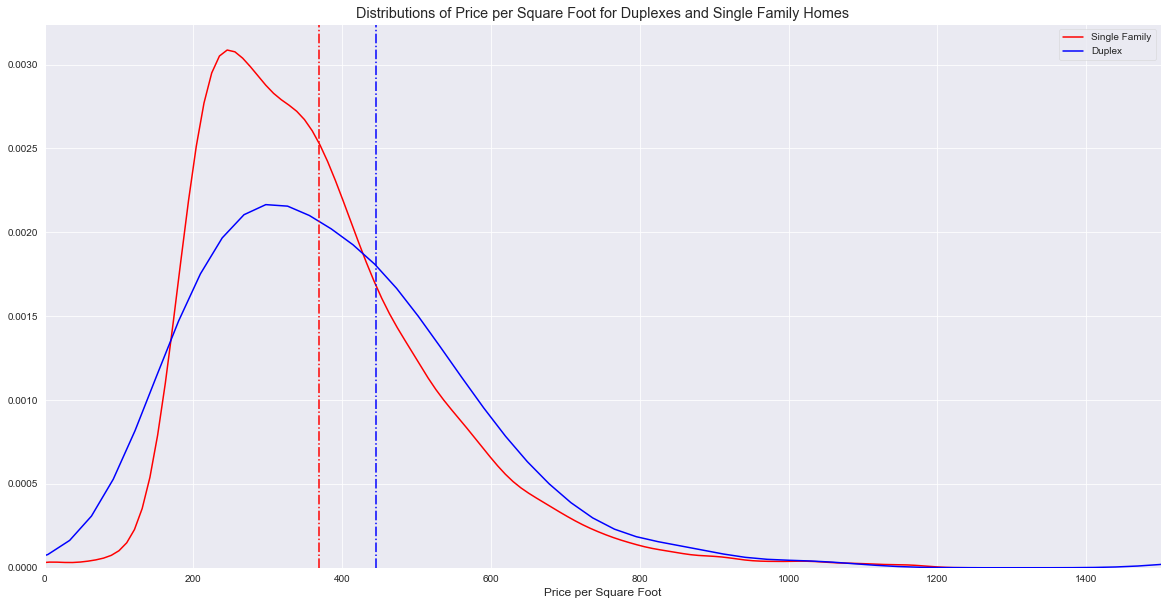

In [136]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set_style('darkgrid')
sns.distplot(single_prices, hist=False, ax=ax, label="Single Family", color='red')
sns.distplot(duplex_prices, hist=False, ax=ax, label='Duplex', color='blue')
ax.set_xlim(0,1500)
ax.set_xlabel("Price per Square Foot")
ax.set_title('Distributions of Price per Square Foot for Duplexes and Single Family Homes')
ax.legend(['Single Family', 'Duplex'])
ax.axvline(single_mean, color='r', linestyle='-.')
ax.axvline(duplex_mean, color='b', linestyle='-.')
plt.legend()
plt.show()
fig.savefig('../../src/duplex.png')

In [84]:
single_prices.mean()

368.96466675006957

In [85]:
duplex_prices.mean()

445.33177690012616